# SVM Further Exploration

After the previous analysis, we have developed an interest in SVM. We will now explore the SVM algorithm in more depth and apply it to a different dataset.

Support Vector Machine (SVM) is a powerful machine learning algorithm used for binary classification tasks. It aims to find the optimal hyperplane that best separates data points of different classes in a high-dimensional feature space. The key idea of SVM is to identify the 'support vectors', which are the data points closest to the decision boundary or hyperplane. These support vectors play a critical role in determining the position and orientation of the hyperplane, making SVM a robust and effective method for solving binary classification problems.

## Using Cross Validation

Cross-validation is a technique used in machine learning to evaluate the performance of a model. It involves dividing the dataset into multiple folds, training the model on a subset of the folds, and evaluating it on the remaining fold. This process is repeated multiple times to obtain a reliable estimate of the model's performance. Cross-validation is commonly used for model evaluation, selection, and performance estimation.

In this further exploration, we utilize cross-validation for analysis.

## Importing Libraries and Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

## cross validation
from sklearn.model_selection import cross_val_score

In [9]:
X = pd.read_csv('data/cleaned/X.csv')
y = pd.read_csv('data/cleaned/y.csv')

## Exploring the Data with 2 Features

To gain a preliminary understanding of SVM, we choose to analyze two parameters, which allows for better visualization and intuitive comprehension.

In [10]:
X_important = X[["meanfun", "IQR"]]

### Use 2 Features

Firstly, for easier visualization, we try to use only 2 features, which is `meanfun` and `IQR`.

In [11]:
def draw_svm_plot(svm, X, y, title):
    plt.figure(figsize=(20, 20))
    x_plot = np.linspace(X["meanfun"].min(), X["meanfun"].max(), 100)
    y_plot = np.linspace(X["IQR"].min(), X["IQR"].max(), 100)
    X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
    xy = np.vstack([X_plot.ravel(), Y_plot.ravel()]).T
    Z = svm.decision_function(xy).reshape(X_plot.shape)
    plt.contour(X_plot, Y_plot, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"], linewidths=3)
    sns.scatterplot(data=X_important, x="meanfun", y="IQR", hue=y.squeeze())
    plt.xlabel("meanfun")
    plt.ylabel("IQR")
    plt.title(title)
    plt.show()

#### Linear Kernel

The linear kernel is the simplest kernel. The formula for the linear kernel is:
$$
K(x, x') = x^T x'
$$

Accuracy: 0.9661


C:\Users\pufan\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


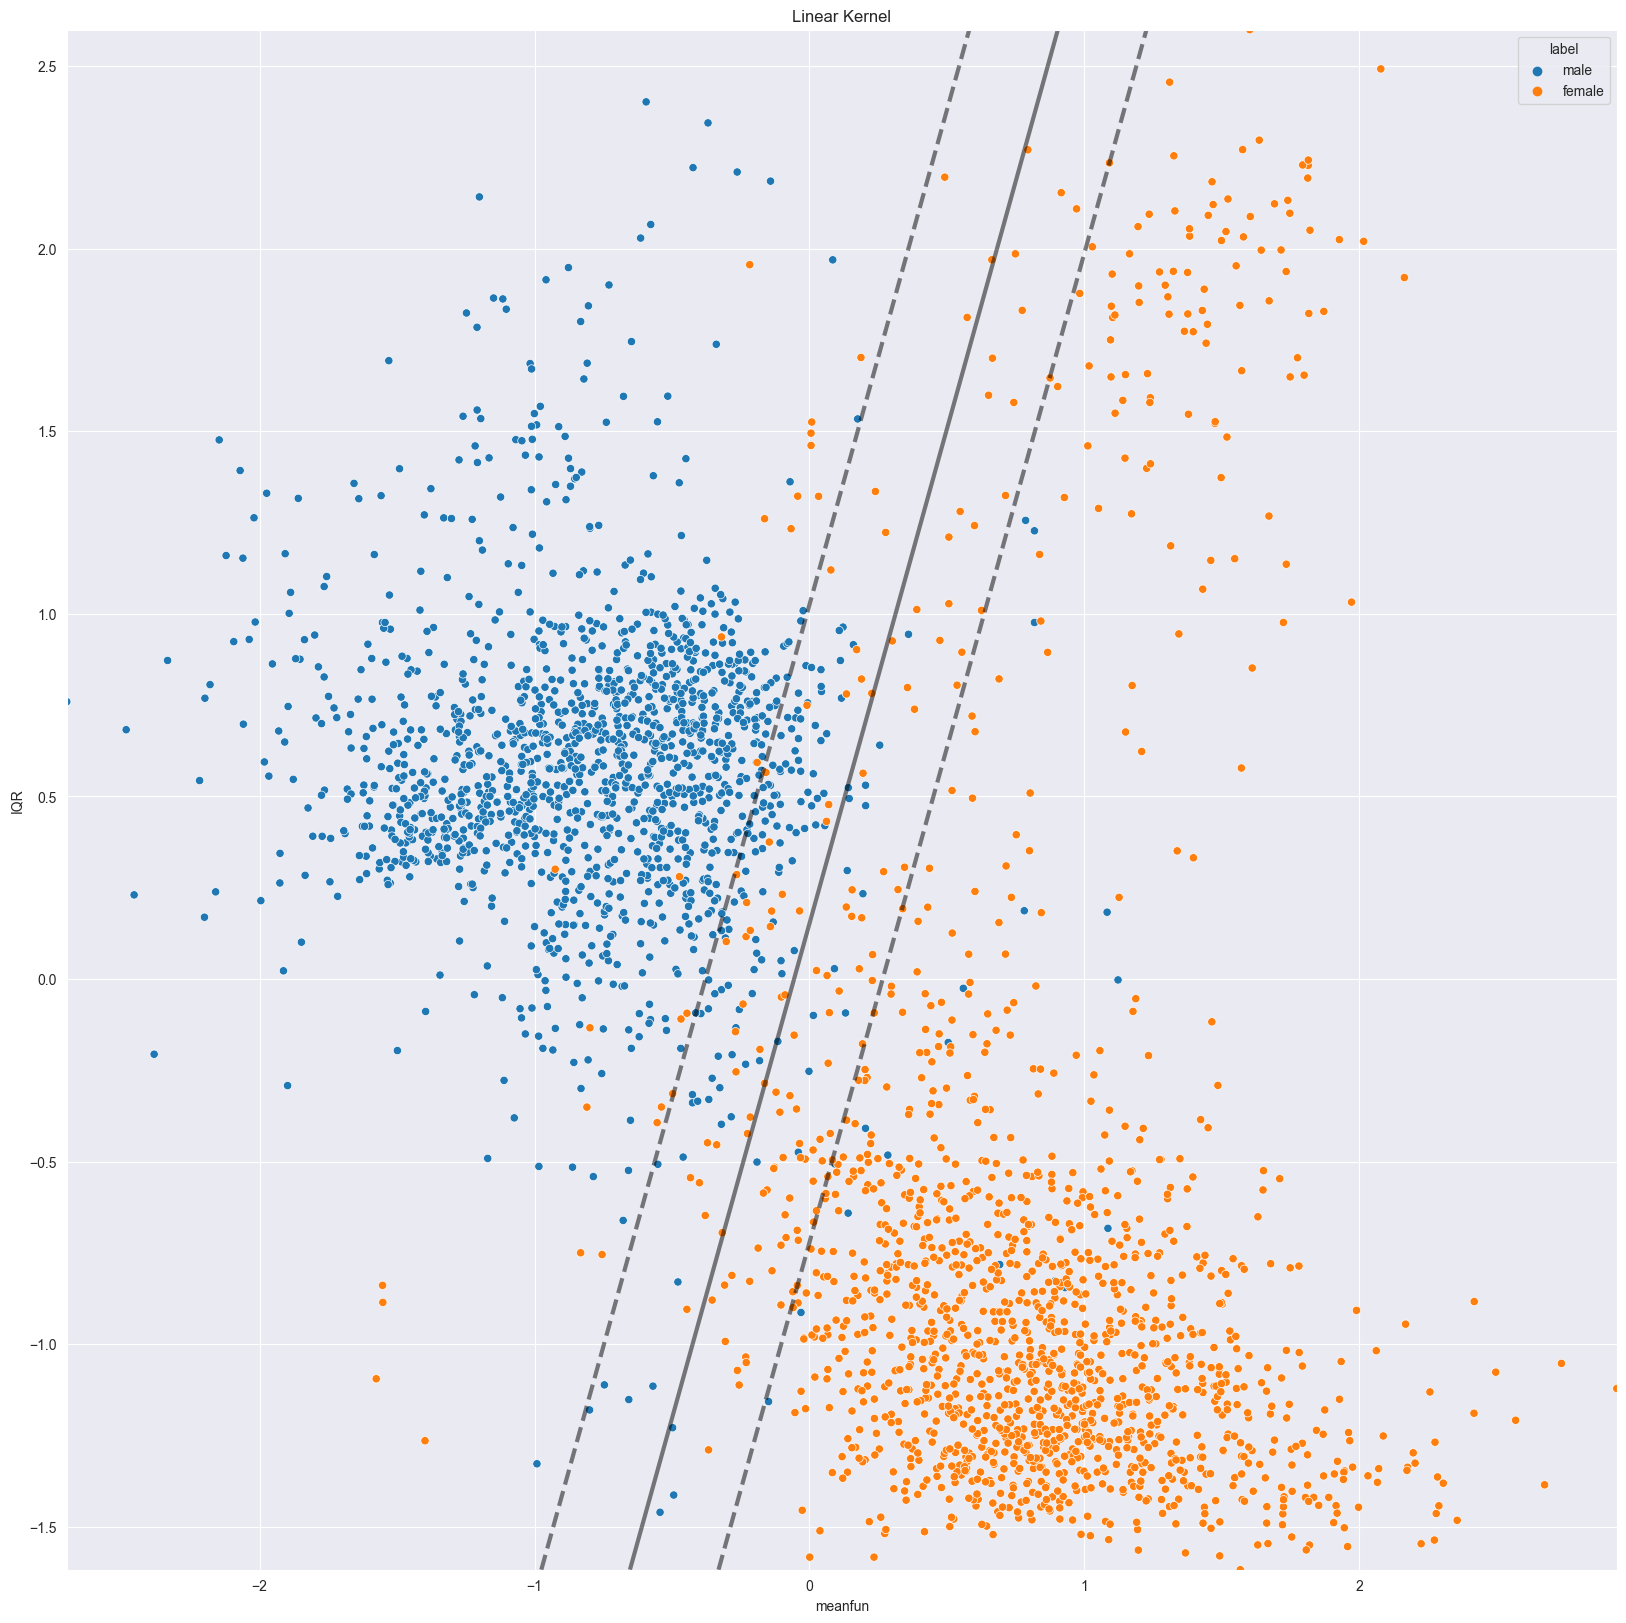

In [20]:
from sklearn.svm import SVC

svm_linear = SVC(random_state=87, kernel="linear").fit(X_important, y.squeeze()) # Create SVM model object
scores = cross_val_score(svm_linear, X_important, y.squeeze(), cv=5)  # Perform 5-fold cross-validation
svm_linear_accuracy = scores.mean()  # Get the average accuracy across all folds

print("Accuracy: {:.4f}".format(svm_linear_accuracy))

draw_svm_plot(svm_linear, X_important, y, "Linear Kernel")

#### Polynomial Kernel

The polynomial kernel is a more complex kernel. The formula for the polynomial kernel is:
$$
K(x, x') = (x^T x' + 1)^d
$$

Let's try to use the polynomial kernel with degree 3.

Accuracy: 0.9458


C:\Users\pufan\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


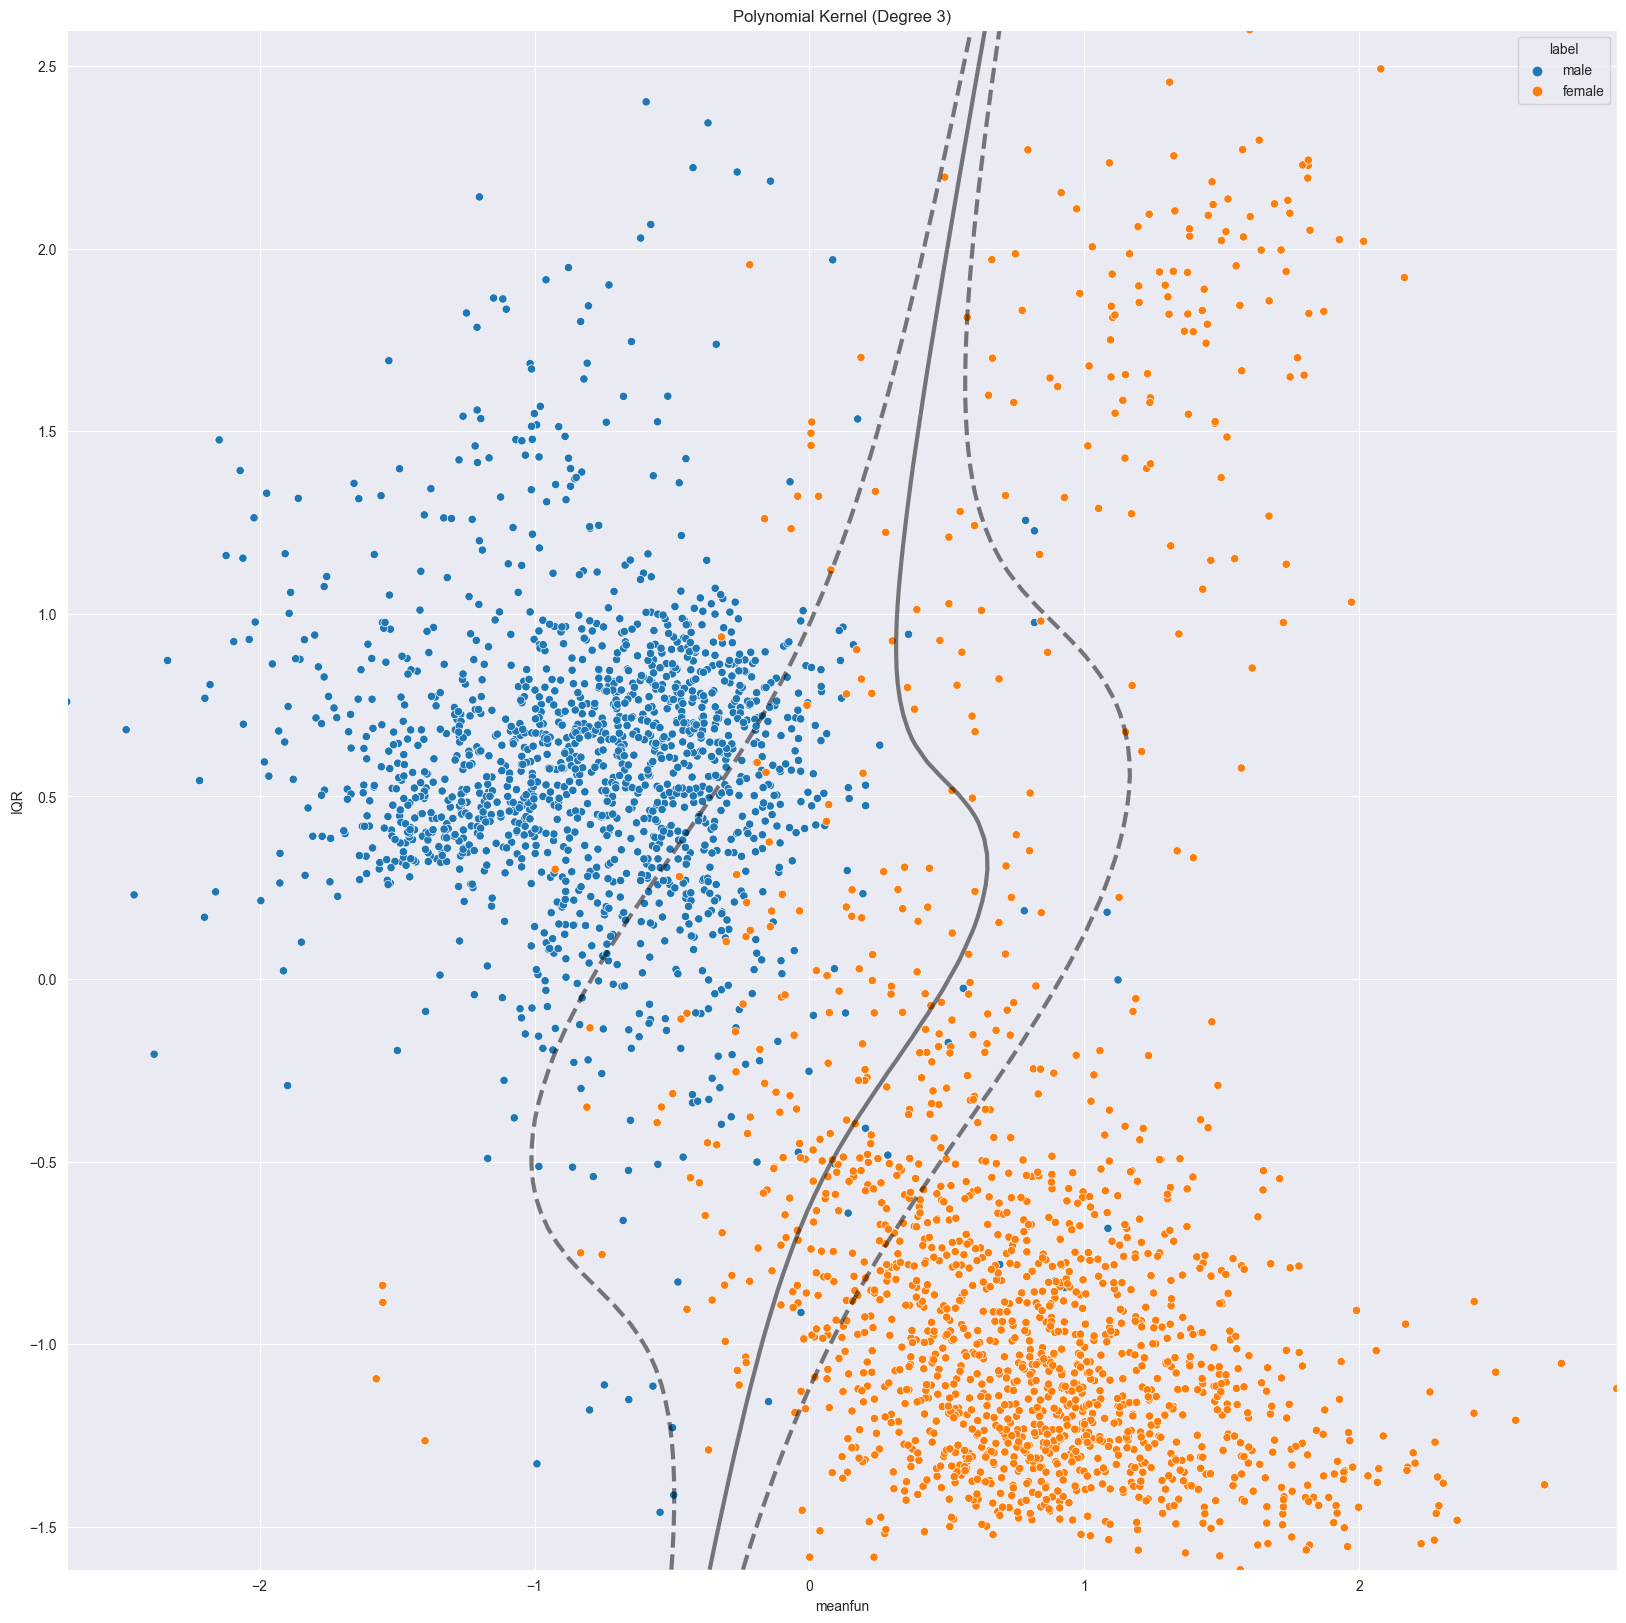

In [21]:
svm_poly = SVC(random_state=87, kernel="poly", degree=3).fit(X_important, y.squeeze())

scores = cross_val_score(svm_poly, X_important, y.squeeze(), cv=5)
svm_poly_accuracy = scores.mean()

print("Accuracy: {:.4f}".format(svm_poly_accuracy))

draw_svm_plot(svm_poly, X_important, y, "Polynomial Kernel (Degree 3)")

#### Gaussian Kernel

The Gaussian kernel is a more complex kernel. The formula for the Gaussian kernel is:
$$
K(x, x') = \exp(-\gamma ||x - x'||^2)
$$

Accuracy: 0.9684


C:\Users\pufan\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


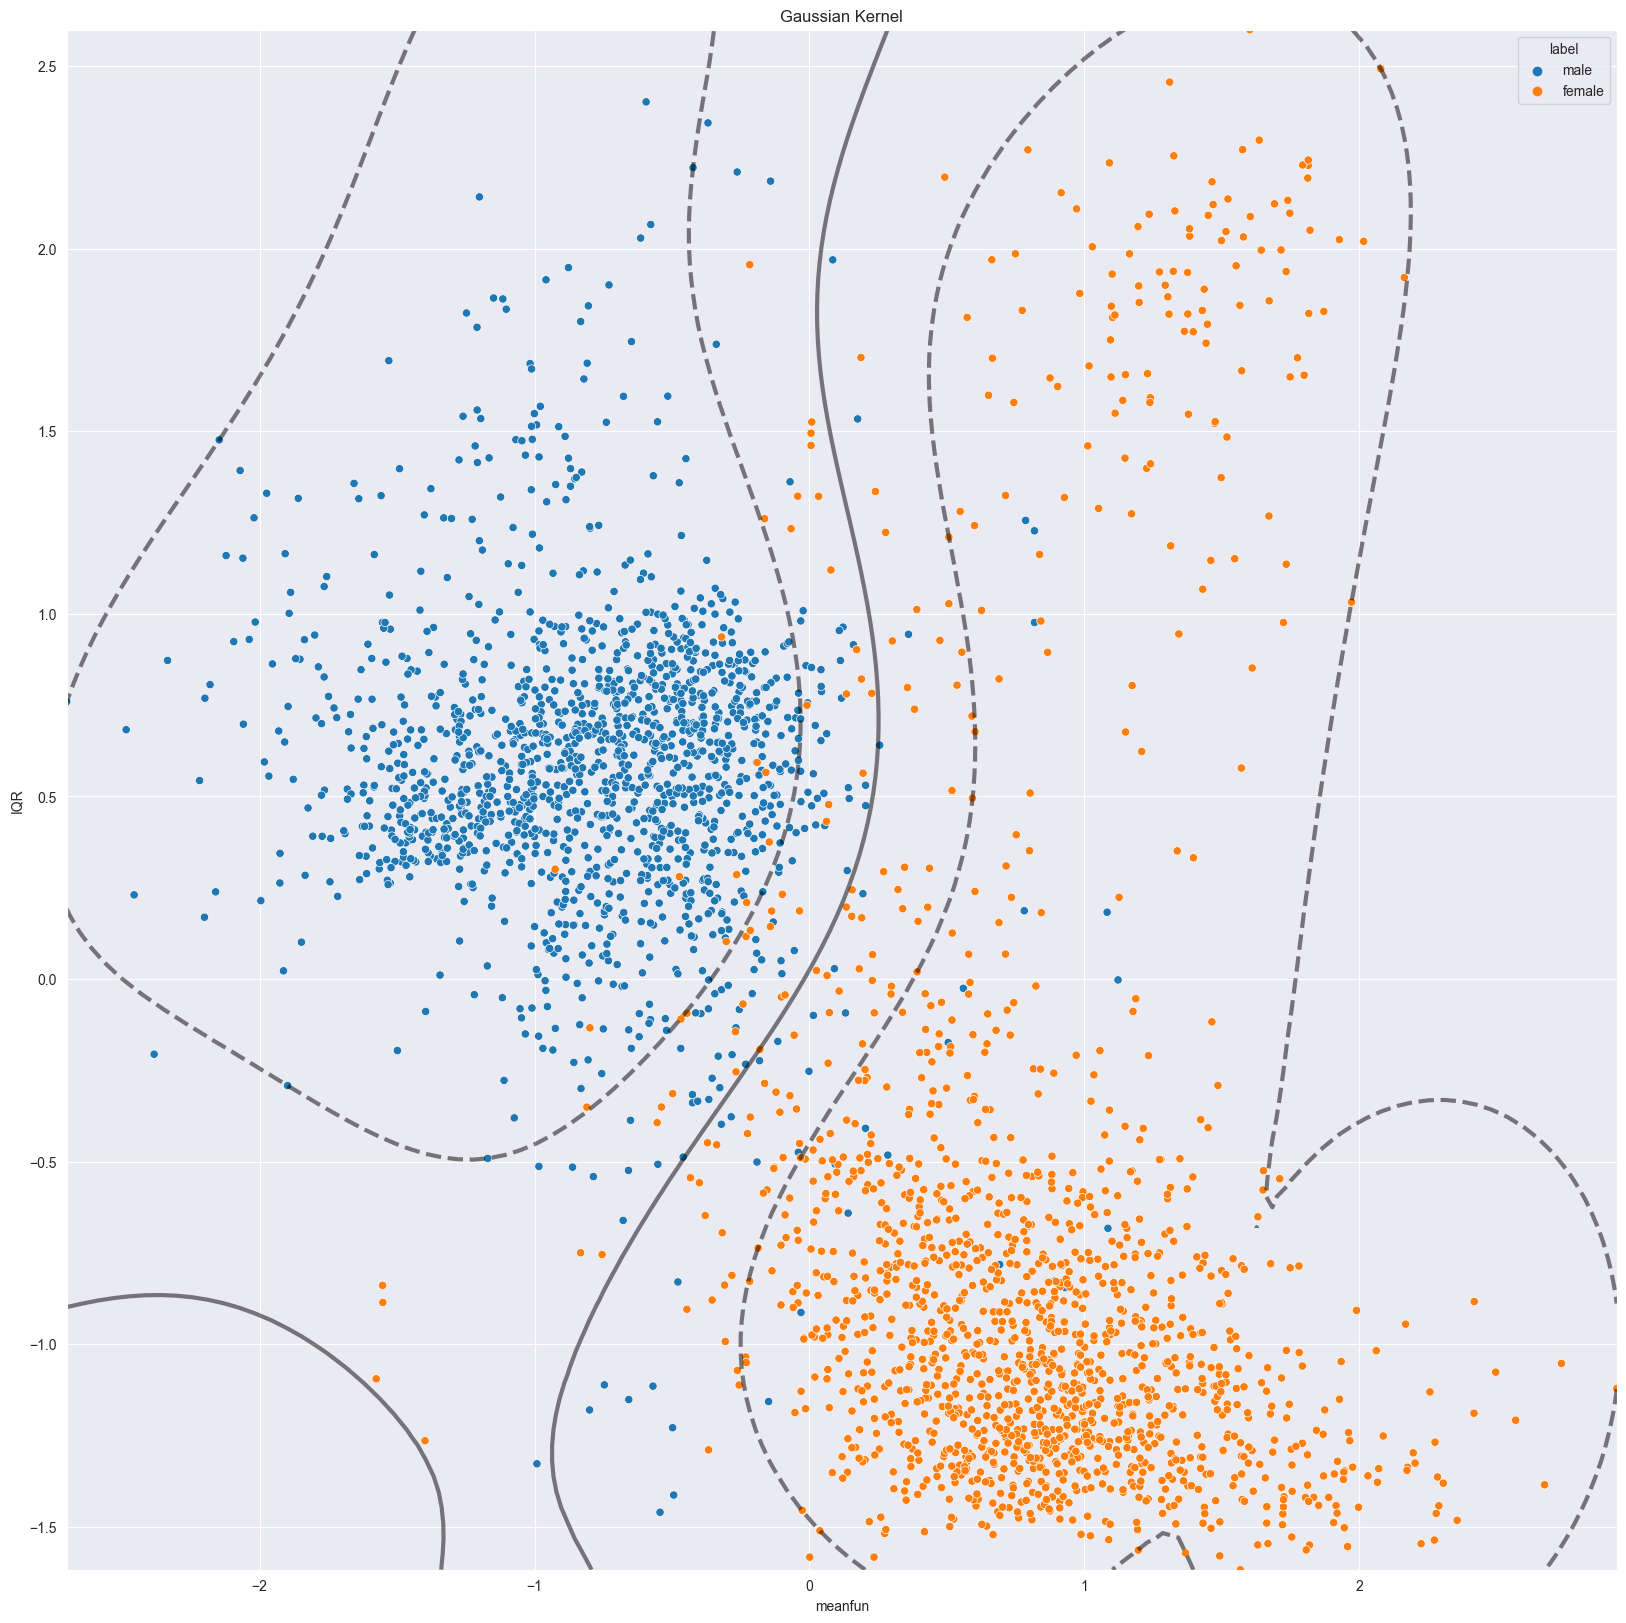

In [23]:
svm_gaussian = SVC(random_state=87, kernel="rbf").fit(X_important, y.squeeze())

scores = cross_val_score(svm_gaussian, X_important, y.squeeze(), cv=5)
svm_gaussian_accuracy = scores.mean()

print("Accuracy: {:.4f}".format(svm_gaussian_accuracy))

draw_svm_plot(svm_gaussian, X_important, y, "Gaussian Kernel")

#### Sigmoid Kernel

The sigmoid kernel is a more complex kernel. The formula for the sigmoid kernel is:
$$
K(x, x') = \tanh(\gamma x^T x' + r)
$$

Accuracy: 0.8654


C:\Users\pufan\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


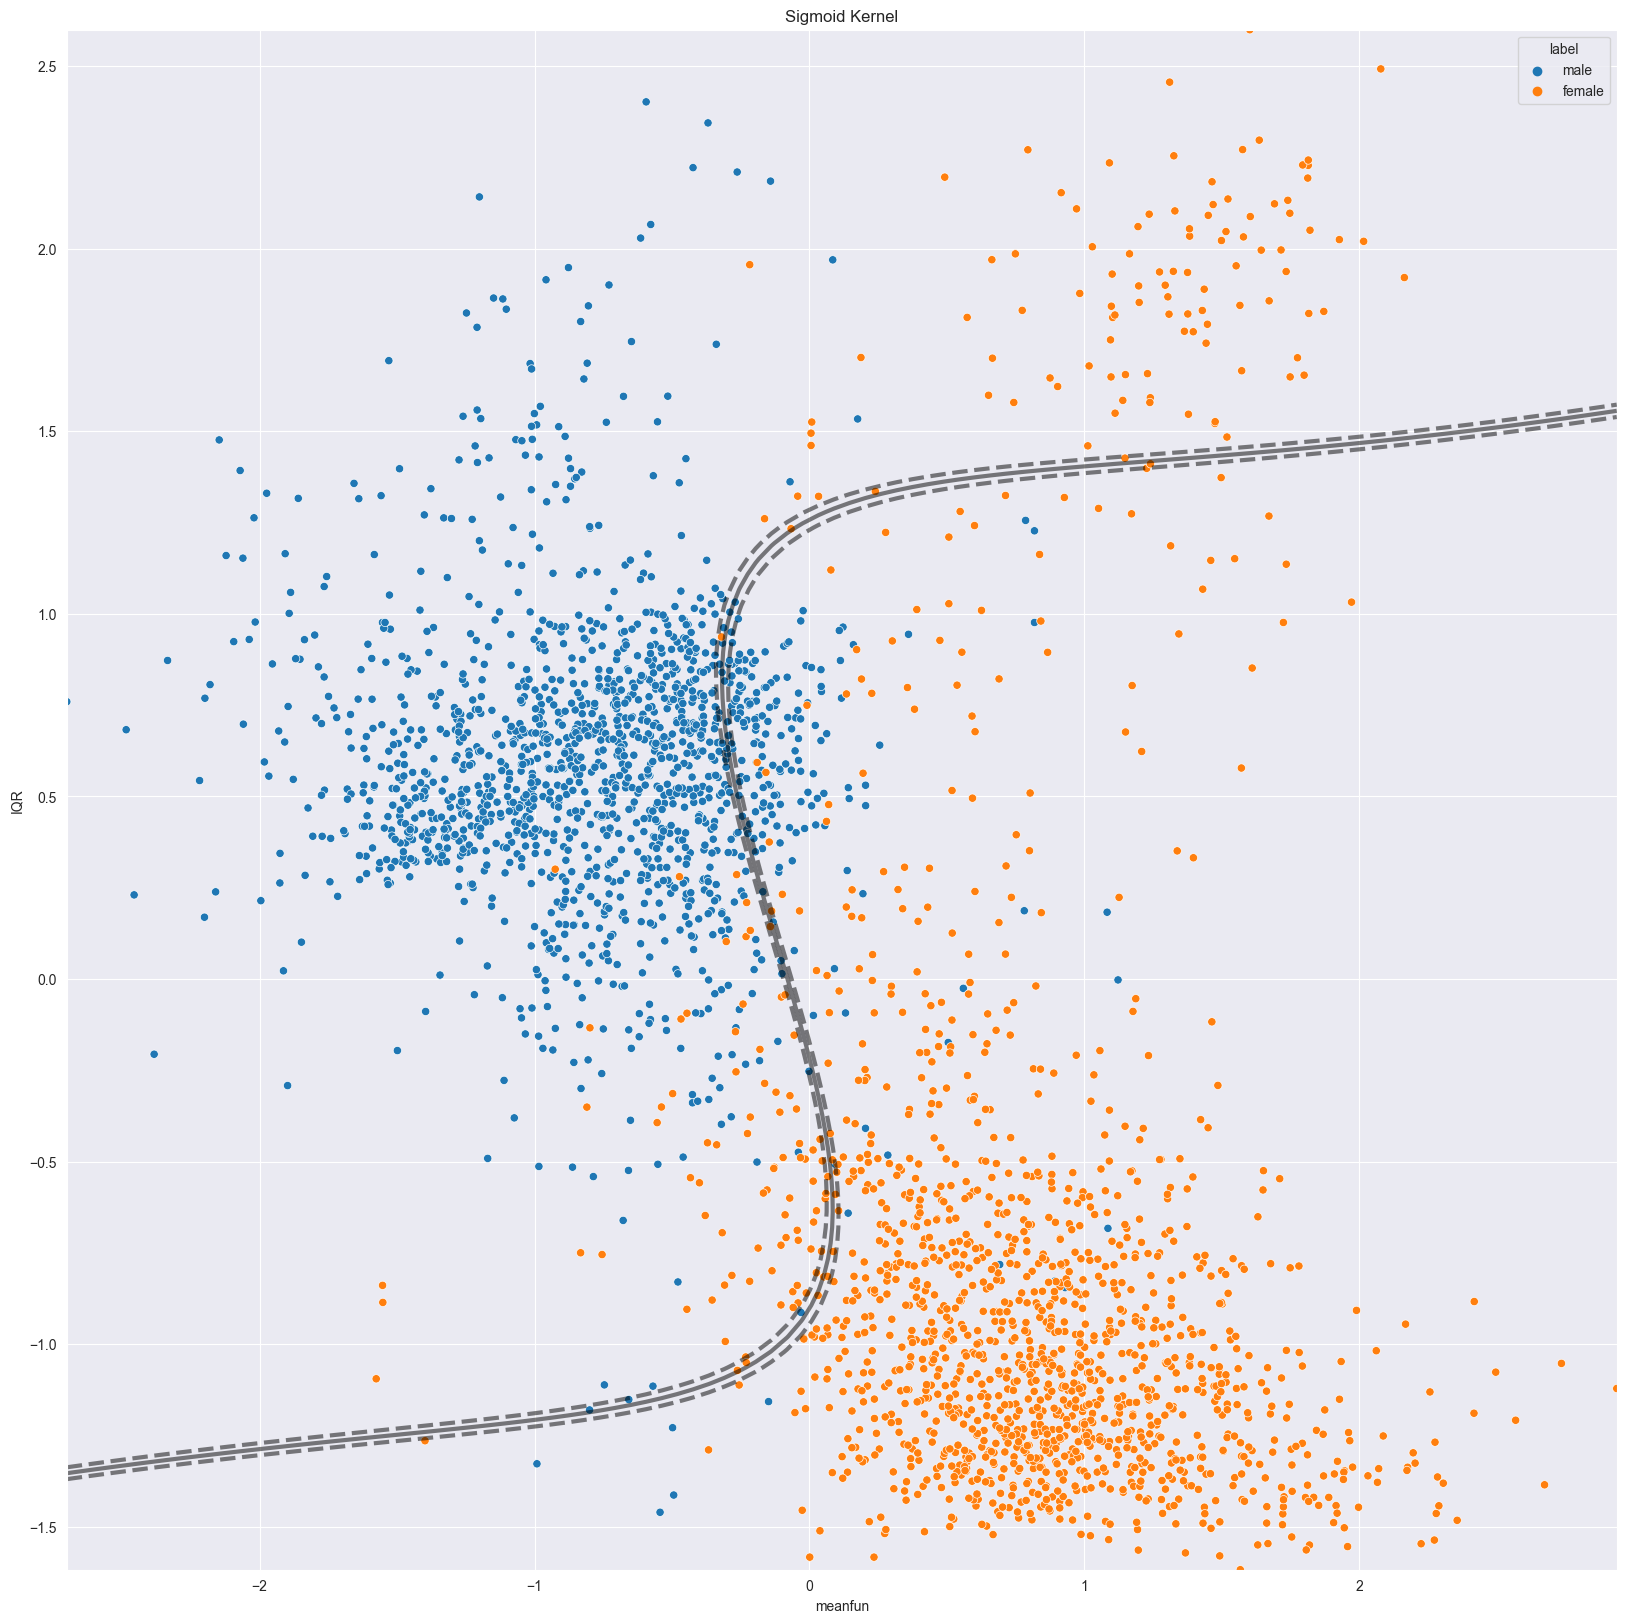

In [25]:
svm_sigmoid = SVC(random_state=87, kernel="sigmoid").fit(X_important, y.squeeze())

scores = cross_val_score(svm_sigmoid, X_important, y.squeeze(), cv=5)
svm_sigmoid_accuracy = scores.mean()

print("Accuracy: {:.4f}".format(svm_sigmoid_accuracy))

draw_svm_plot(svm_sigmoid, X_important, y, "Sigmoid Kernel")

Here are the comparison of the results of the different kernels:

In [26]:
results = pd.DataFrame(
    {
        "Kernel": ["Linear", "Polynomial", "Gaussian", "Sigmoid"],
        "Accuracy": [svm_linear_accuracy, svm_poly_accuracy, svm_gaussian_accuracy, svm_sigmoid_accuracy],
    }
)
results

Kernel  Accuracy
0      Linear  0.966099
1  Polynomial  0.945824
2    Gaussian  0.968427
3     Sigmoid  0.865405

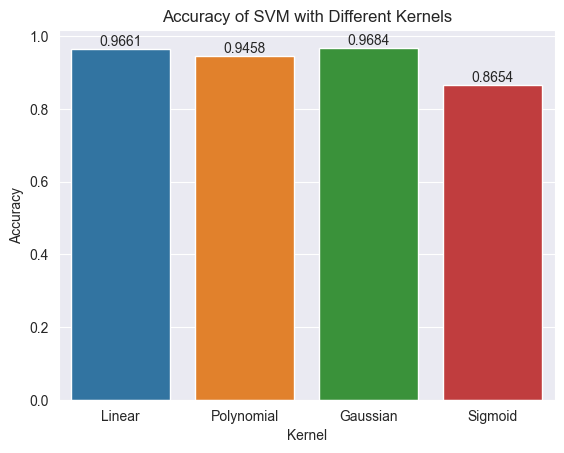

In [29]:
# Create the bar plot with accuracy values as annotations
ax = sns.barplot(data=results, x="Kernel", y="Accuracy")
ax.set_xlabel("Kernel")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy of SVM with Different Kernels")

# Add accuracy values as annotations to the bar plot
for i in range(len(results)):
    ax.annotate(f"{results['Accuracy'][i]:.4f}", (i, results['Accuracy'][i]), ha='center', va='bottom')

# Show the plot
plt.show()

C:\Users\pufan\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pufan\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pufan\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\pufan\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


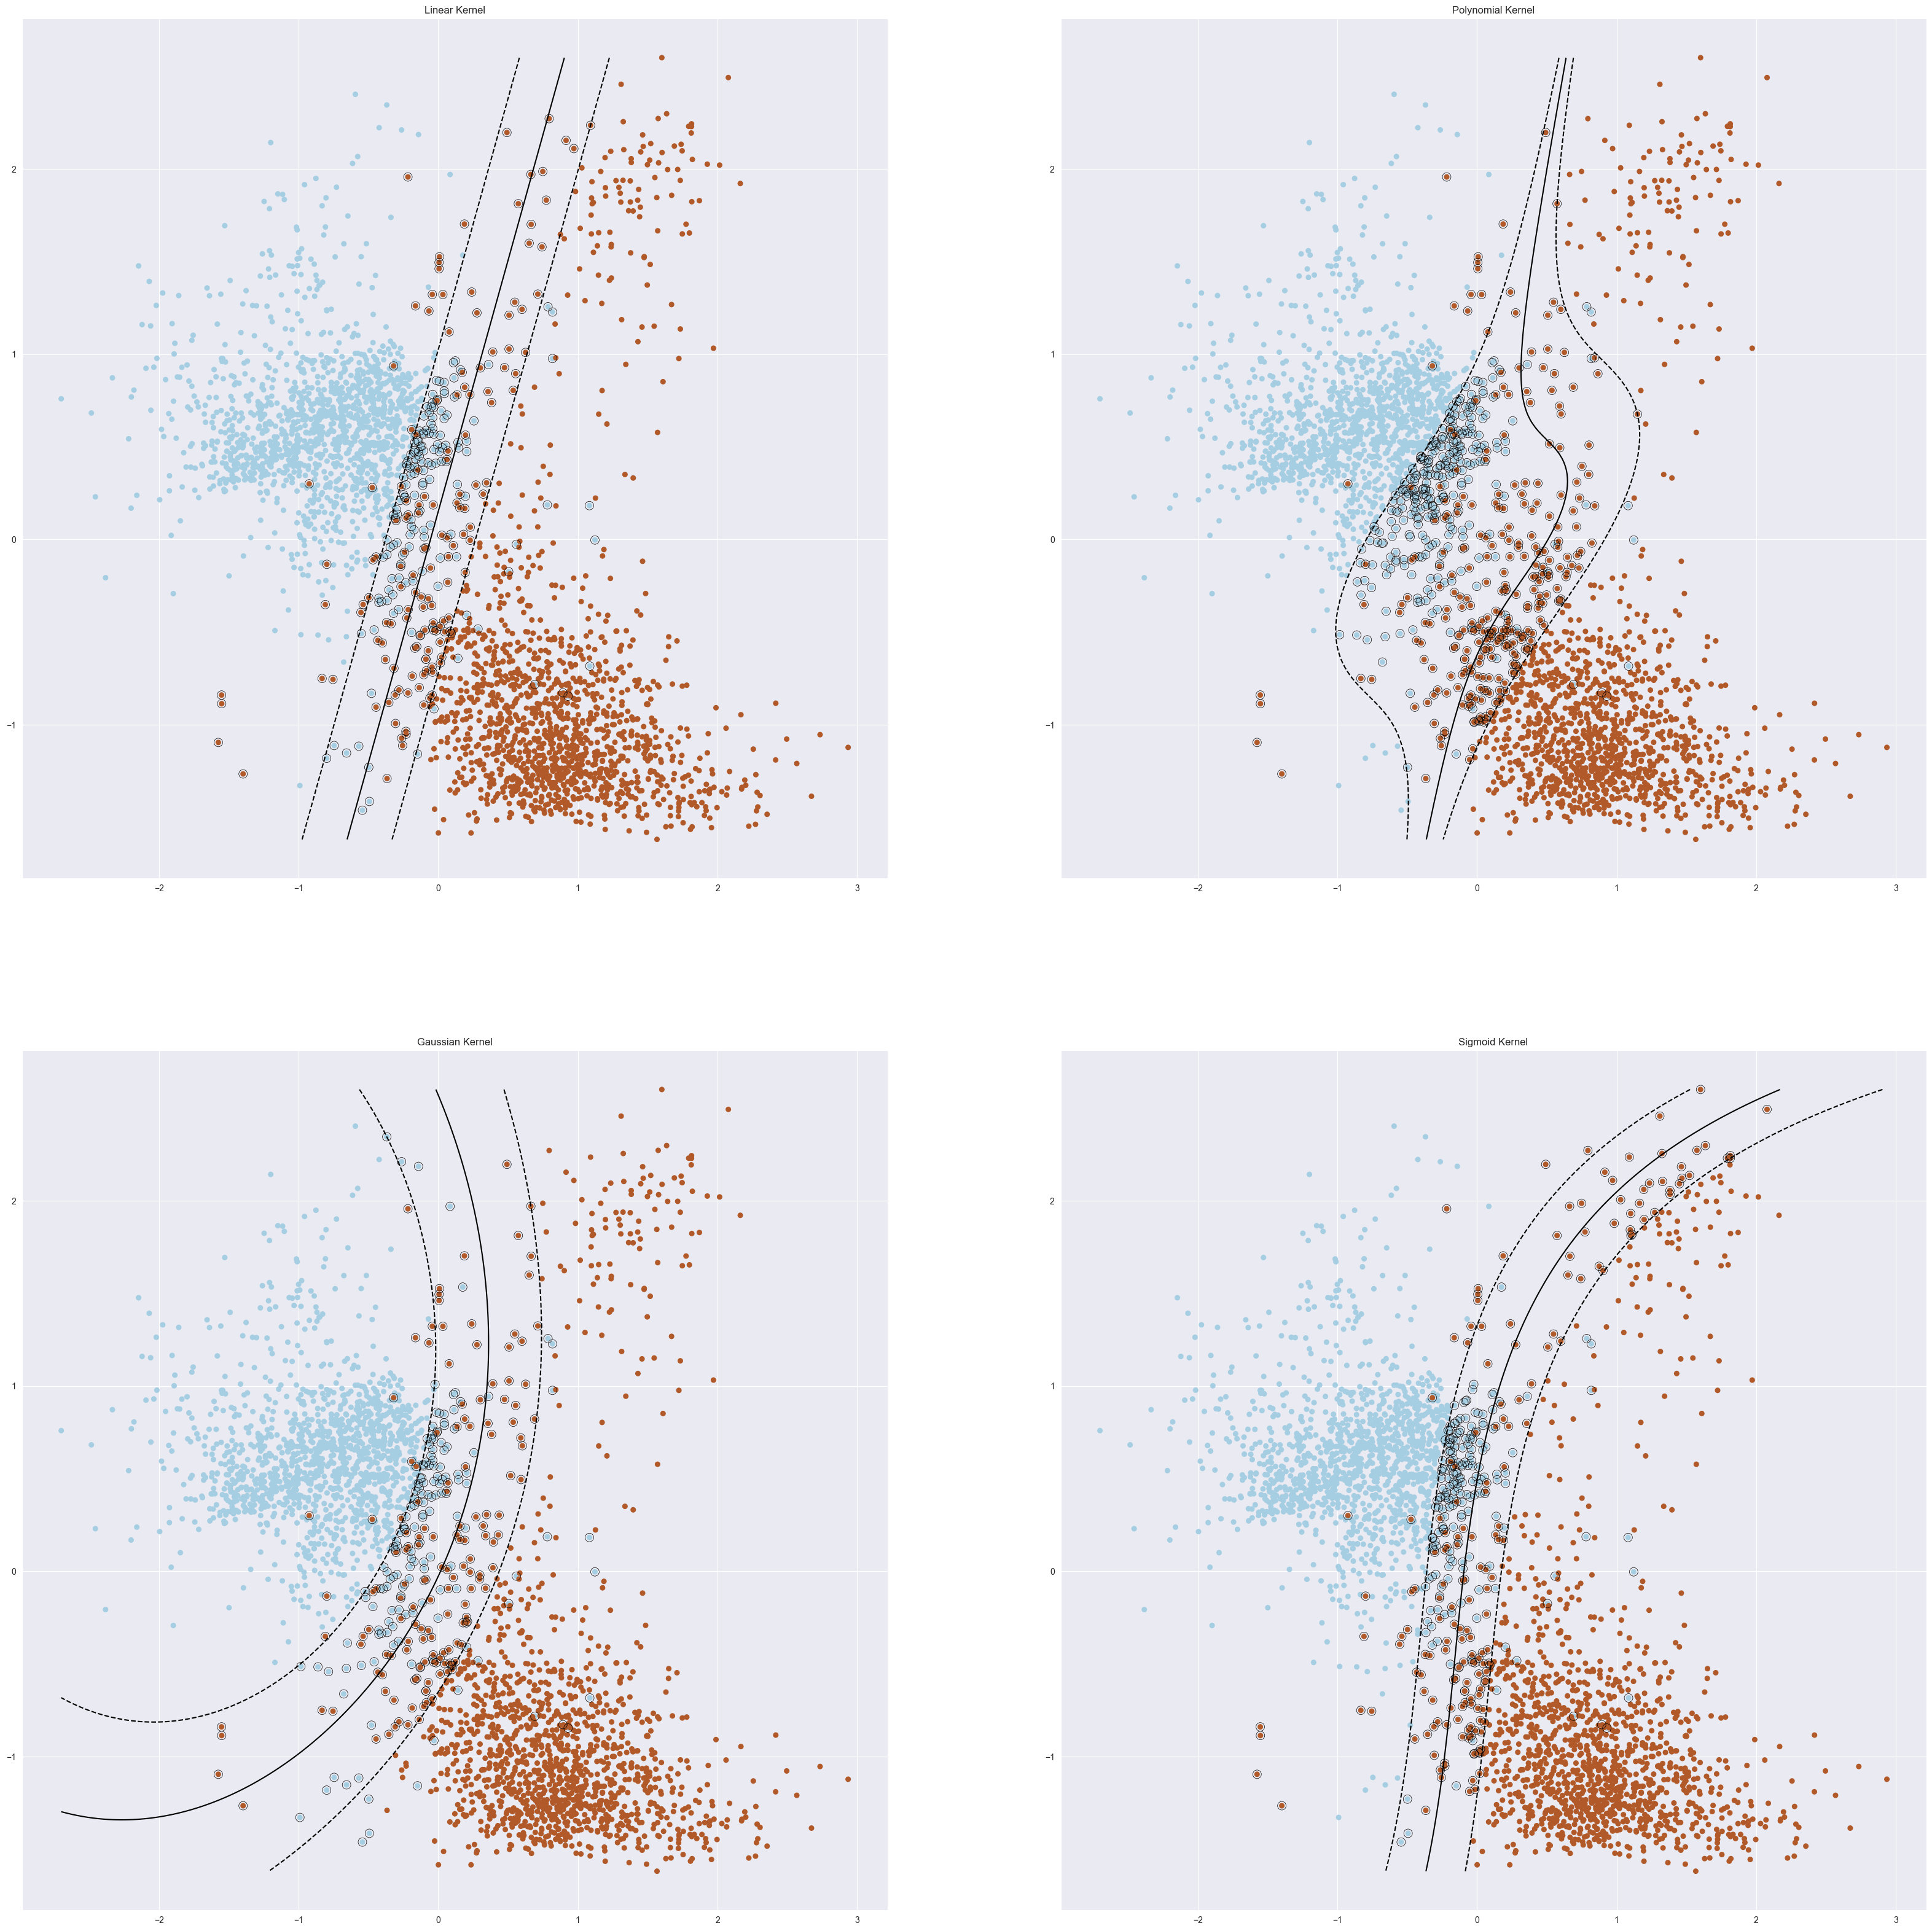

In [30]:
def draw_svm_plot_subplot(svm, X, y, title, axes):
    X = np.array(X)
    y = np.array(y == "female")

    axes.set_title(title)
    axes.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    axes.axis("tight")

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

    axes.contour(XX, YY, Z, colors=["k", "k", "k"], linestyles=["--", "-", "--"], levels=[-1, 0, 1])
    axes.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, linewidth=0.5, facecolors="none",
                 edgecolors="k")


figure, axes = plt.subplots(2, 2, figsize=(40, 40))
draw_svm_plot_subplot(SVC(random_state=87, kernel="linear").fit(X_important, y.squeeze()), X_important, y, "Linear Kernel", axes[0, 0])
draw_svm_plot_subplot(SVC(random_state=87, kernel="poly", degree=3).fit(X_important, y.squeeze()), X_important, y, "Polynomial Kernel", axes[0, 1])
draw_svm_plot_subplot(SVC(random_state=87, kernel="rbf", gamma=0.1).fit(X_important, y.squeeze()), X_important, y, "Gaussian Kernel", axes[1, 0])
draw_svm_plot_subplot(SVC(random_state=87, kernel="sigmoid", gamma=0.1, coef0=0.1).fit(X_important, y.squeeze()), X_important, y, "Sigmoid Kernel", axes[1, 1])